Spearman Rank Correlation: 0.93
Kendall's Tau: 0.78


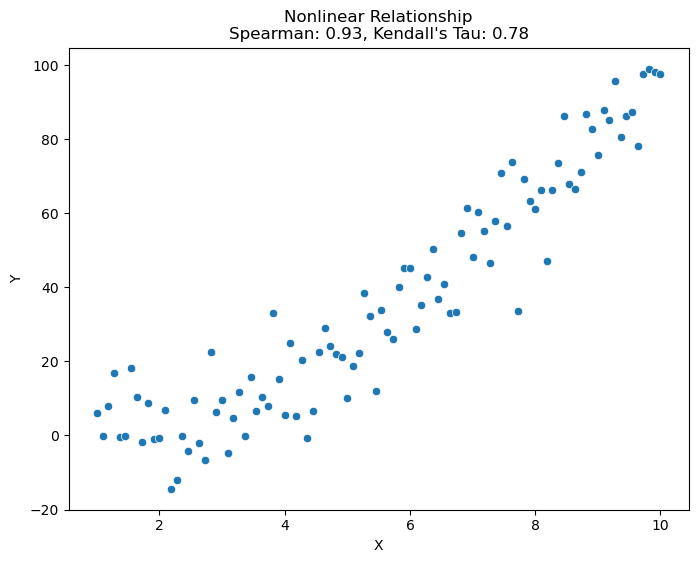

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(1, 10, 100)
y = x**2 + np.random.normal(0, 10, 100)  # Nonlinear relationship with noise

# Calculate Spearman's and Kendall's Tau
spearman_corr, _ = stats.spearmanr(x, y)
kendall_tau, _ = stats.kendalltau(x, y)

print(f"Spearman Rank Correlation: {spearman_corr:.2f}")
print(f"Kendall's Tau: {kendall_tau:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y)
plt.title(f"Nonlinear Relationship\nSpearman: {spearman_corr:.2f}, Kendall's Tau: {kendall_tau:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Lag-1 Serial Correlation: 0.98


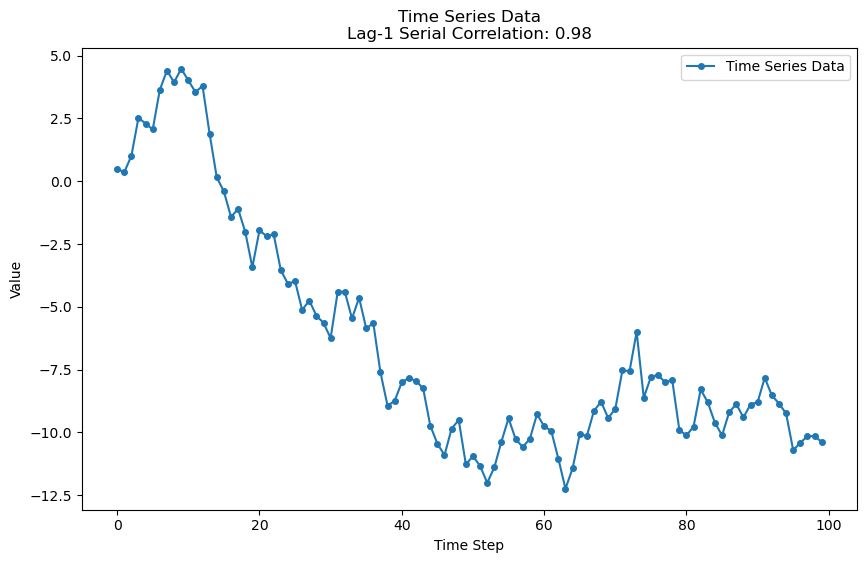

In [3]:
# Generate synthetic time series data with autocorrelation
np.random.seed(42)
n = 100
time_series = np.cumsum(np.random.normal(0, 1, n))  # Random walk

# Calculate Lag-1 serial correlation
serial_corr = np.corrcoef(time_series[:-1], time_series[1:])[0, 1]
print(f"Lag-1 Serial Correlation: {serial_corr:.2f}")

# Visualization of time series data with Lag-1 indication
plt.figure(figsize=(10, 6))
plt.plot(time_series, marker='o', markersize=4, label="Time Series Data")
plt.title(f"Time Series Data\nLag-1 Serial Correlation: {serial_corr:.2f}")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

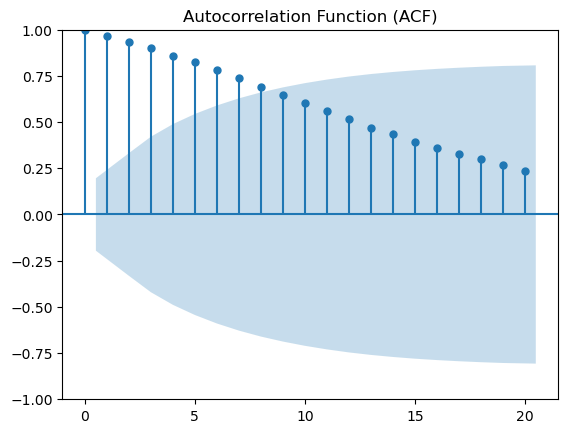

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation function
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=20, title="Autocorrelation Function (ACF)")
plt.show()


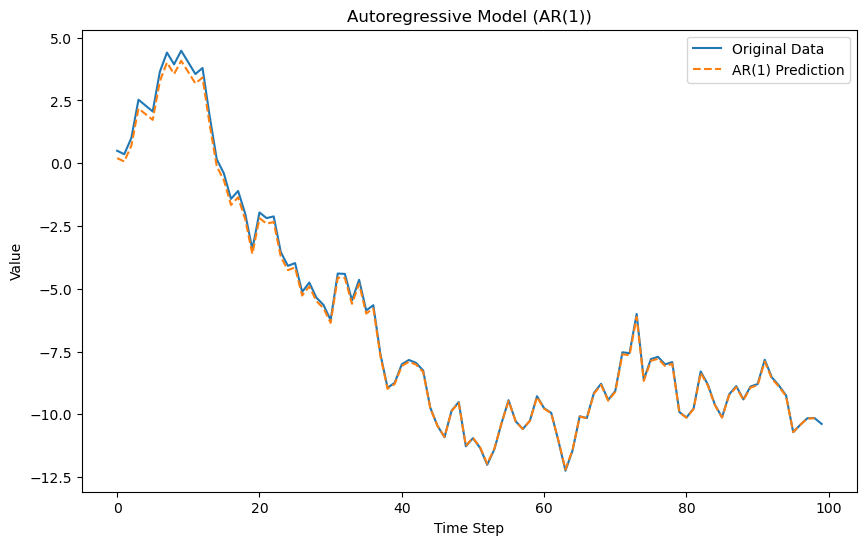

In [5]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an autoregressive model
ar_model = AutoReg(time_series, lags=1).fit()
predicted_values = ar_model.predict(start=1, end=len(time_series)-1)

# Plot the original time series and AR(1) predictions
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data")
plt.plot(predicted_values, label="AR(1) Prediction", linestyle='--')
plt.title("Autoregressive Model (AR(1))")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.show()
